Importando dados e bibliotecas:

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv", sep=";")
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


Analisando dados do Data Frame

In [2]:
df.shape

(32960, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [111]:
df.describe()

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,32960.000000,32960.000000,32960.000000,32960.000000,3.294300e+04,2.886700e+04,2.272300e+04
mean,1.771390,1.749059,0.665777,231.901547,1.295266e+04,2.388062e+03,2.364410e+03
std,1.717869,20.380402,1.176525,1135.254152,6.675220e+05,3.918496e+04,1.795641e+05
min,0.000000,0.000000,0.000000,0.000000,7.500000e+01,1.000000e+00,1.000000e+00
25%,0.000000,0.000000,0.000000,55.000000,1.500000e+03,5.900000e+02,1.100000e+02
50%,2.000000,1.000000,0.000000,87.000000,2.800000e+03,9.900000e+02,2.500000e+02
75%,3.000000,2.000000,1.000000,170.000000,6.500000e+03,1.800000e+03,6.970000e+02
max,100.000000,1966.000000,70.000000,90000.000000,1.200000e+08,6.552570e+06,2.705307e+07


In [138]:
 termino_Q4 ,inicio_Q4 = "{:,.2f}".format(1.2 * 10 **8), "{:,.2f}".format(6.5 * 10 **3)
print(f"Conclusão do describe: o quarto quartil inicia-se com o valor de {inicio_Q4} e termina com o valor de {termino_Q4}", "O que representa uma grande dispersão dos valores devido aos outsiders" )

Conclusão do describe: o quarto quartil inicia-se com o valor de 6,500.00 e termina com o valor de 120,000,000.00 O que representa uma grande dispersão dos valores devido aos outsiders


Conclusão do describe: o quarto quartil inicia-se com o valor de 6500 e termina com o valor de 12000

------


Corrigindo dados

temos 17 imóveis sem valor... o que fazer?



1.   Excluílos da lista?
2. Completá-los com base nos valores médios de seus respectivos TIPOs
3.   Completá-los com um valor médio?



# Daqui em diante seguiremos com o plano 2


In [4]:
# Verificando quais são os imóveis com valores Nulos

df_valor_null = df[df["Valor"].isna()]
df_valor_null

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
76,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
2186,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
2456,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2646,Loja/Salão,Barra da Tijuca,0,2,0,80,NaN,NaN,NaN
2941,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2973,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
6598,Loja/Salão,Andaraí,0,0,0,326,NaN,NaN,1140.0
7302,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
12683,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
13229,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0


In [5]:
# Conferindo a quantidade de valores nulos

df_valor_null.shape

(17, 9)

O gráfico aponta uma tendência à direita, possuindo grande concentração nos valores pequenos 
 euma grande dispersão nos valores maiores, possuíndo diversos outsiders


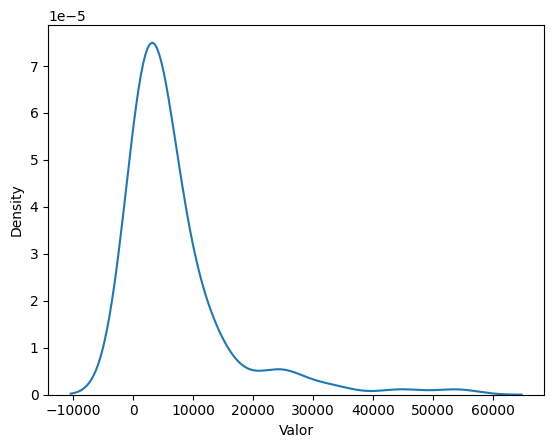

In [164]:
# Avaliando gráfico KDE dos valores em diferentes porções dos dados

sns.kdeplot(data=df[1000:1100], x="Valor")



print("O gráfico aponta uma tendência à direita, possuindo grande concentração nos valores pequenos \n euma grande dispersão nos valores maiores, possuíndo diversos outsiders")

Existem 334 imóveis com valores a cima de: R$100,000.00


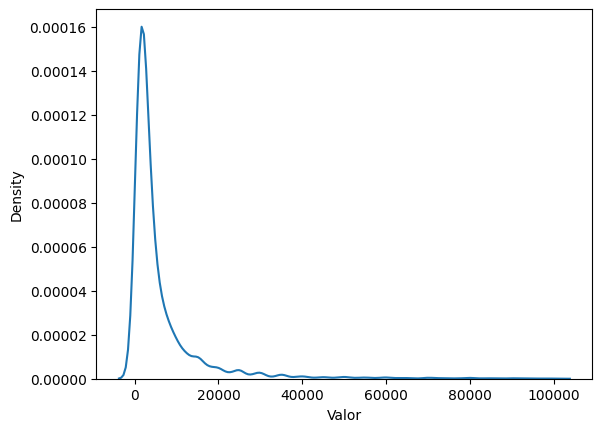

In [174]:
# Definindo valor de outliers a serem ignorados

cort_outliers = 100000
x = (df["Valor"] > cort_outliers).sum()

sns.kdeplot(data=df[df["Valor"] < cort_outliers], x="Valor")


print(f"Existem {x} imóveis com valores a cima de: R${y:,.2f}")

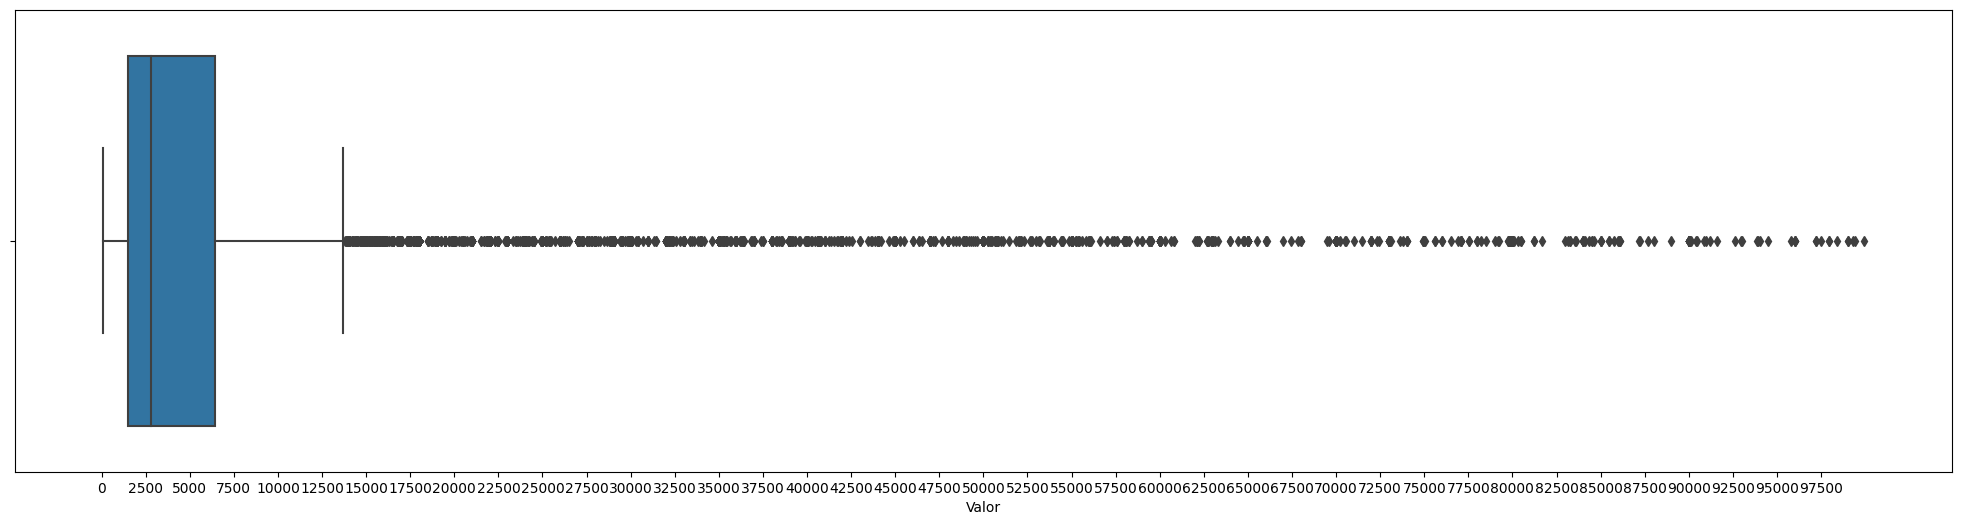

In [175]:
# Box Plot com redução dos outliers para possibilitar visualização

# criando DF sem outsiders (serão excluídos os outsiders que representem imóveis com valores a cima de 100.000,00)
df_sem_outliers = df[df["Valor"] < 100000]

# Plotando Boxplot com redução dos Outsiders
plt.figure(figsize=(25,6))
plt.xticks(np.arange(0,cort_outliers,step=2500))

sns.boxplot(data=df_sem_outliers, x="Valor")

plt.show()

In [201]:
# df[df["Valor"] == df["Valor"].max()]

df[df["Valor"] == df["Valor"]].nlargest(columns="Valor", n=7) #1

#ou

#df[df["Valor"] == df["Valor"]].sort_values(by="Valor", ascending=False).head(10), # 2

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
5592,Prédio Inteiro,Jacarepaguá,0,15,0,1200,120000000.0,NaN,10000.0
4595,Galpão/Depósito/Armazém,Irajá,0,5,0,1100,15000000.0,NaN,1000.0
23491,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,NaN
25632,Prédio Inteiro,Humaitá,0,96,0,8279,1324640.0,165580.0,96889.0
26327,Conjunto Comercial/Sala,Caju,0,0,0,10660,1279200.0,NaN,NaN
21024,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0
28047,Prédio Inteiro,Humaitá,0,96,0,8279,1076270.0,NaN,NaN


In [13]:
df[df["Tipo"] == "Prédio Inteiro"]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
305,Prédio Inteiro,Campo Grande,0,0,0,650,35000.0,NaN,NaN
344,Prédio Inteiro,São Cristóvão,0,0,0,1408,24000.0,NaN,NaN
513,Prédio Inteiro,Barra da Tijuca,0,80,0,5500,480000.0,NaN,NaN
753,Prédio Inteiro,Copacabana,1,1,0,450,63000.0,13500.0,3825.0
...,...,...,...,...,...,...,...,...,...
32016,Prédio Inteiro,Barra da Tijuca,0,0,0,600,10000.0,NaN,NaN
32284,Prédio Inteiro,São Cristóvão,1,40,0,5583,330000.0,NaN,27053070.0
32400,Prédio Inteiro,Centro,0,0,0,637,12000.0,NaN,5922.0
32528,Prédio Inteiro,Botafogo,0,0,0,600,15000.0,NaN,2000.0


In [14]:
df["Tipo"].value_counts()

Apartamento                    19532
Conjunto Comercial/Sala         6815
Loja/Salão                      1426
Casa de Condomínio               996
Casa                             967
Quitinete                        836
Galpão/Depósito/Armazém          623
Flat                             476
Prédio Inteiro                   301
Casa Comercial                   265
Casa de Vila                     249
Loja Shopping/ Ct Comercial      247
Box/Garagem                       82
Terreno Padrão                    70
Loft                              51
Sítio                             10
Loteamento/Condomínio              5
Studio                             4
Hotel                              2
Chácara                            1
Pousada/Chalé                      1
Indústria                          1
Name: Tipo, dtype: int64

In [16]:
df["Valor"].quantile(0.75)

6500.0

In [17]:
df.describe()

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,32960.000000,32960.000000,32960.000000,32960.000000,3.294300e+04,2.886700e+04,2.272300e+04
mean,1.771390,1.749059,0.665777,231.901547,1.295266e+04,2.388062e+03,2.364410e+03
std,1.717869,20.380402,1.176525,1135.254152,6.675220e+05,3.918496e+04,1.795641e+05
min,0.000000,0.000000,0.000000,0.000000,7.500000e+01,1.000000e+00,1.000000e+00
25%,0.000000,0.000000,0.000000,55.000000,1.500000e+03,5.900000e+02,1.100000e+02
50%,2.000000,1.000000,0.000000,87.000000,2.800000e+03,9.900000e+02,2.500000e+02
75%,3.000000,2.000000,1.000000,170.000000,6.500000e+03,1.800000e+03,6.970000e+02
max,100.000000,1966.000000,70.000000,90000.000000,1.200000e+08,6.552570e+06,2.705307e+07


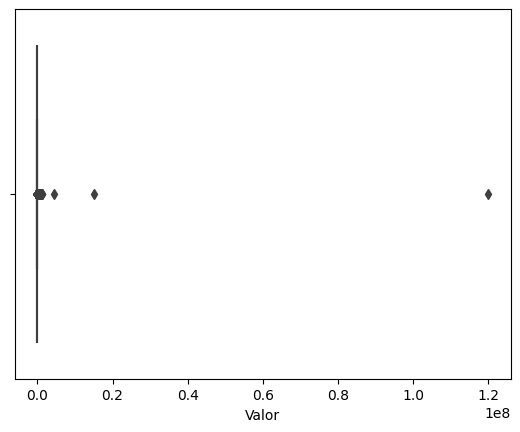

In [18]:
sns.boxplot(data=df, x="Valor")

plt.show()

<Axes: xlabel='Valor'>

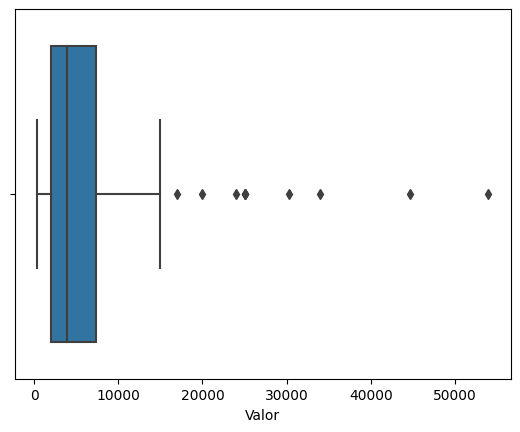

In [19]:
sns.boxplot(data=df[1000:1100], x="Valor")

In [20]:
df["Valor"].value_counts()

1000.0      1077
1500.0      1067
2500.0       998
2000.0       961
3000.0       929
            ... 
100494.0       1
354120.0       1
3509.0         1
93900.0        1
53730.0        1
Name: Valor, Length: 1414, dtype: int64

In [21]:
df_head = df.head()

In [22]:
os_maior.describe()

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,8483.000000,8483.000000,8483.000000,8483.000000,8.483000e+03,6724.000000,6.223000e+03
mean,2.123423,3.479665,1.234705,656.654721,4.344528e+04,5929.811719,7.496855e+03
std,2.627368,10.494905,1.559694,2177.938600,1.315023e+06,12030.996621,3.430265e+05
min,0.000000,0.000000,0.000000,0.000000,6.500000e+03,1.000000,1.000000e+00
25%,0.000000,0.000000,0.000000,182.000000,8.500000e+03,1900.000000,5.800000e+02
50%,3.000000,2.000000,1.000000,300.000000,1.250000e+04,2976.000000,1.100000e+03
75%,4.000000,3.000000,2.000000,515.000000,2.200000e+04,5152.750000,2.274500e+03
max,100.000000,600.000000,24.000000,90000.000000,1.200000e+08,196291.000000,2.705307e+07


<Axes: xlabel='Valor'>

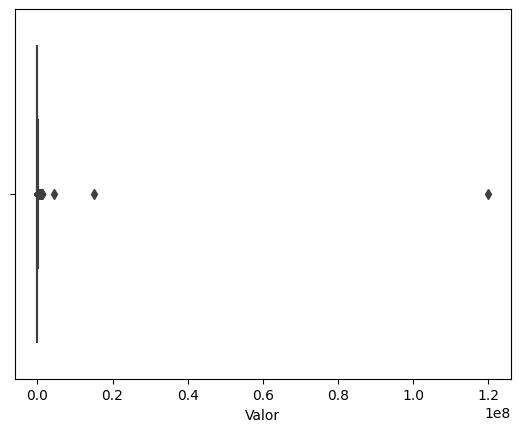

In [23]:
sns.boxplot(data=os_maior, x="Valor")

<Axes: ylabel='Density'>

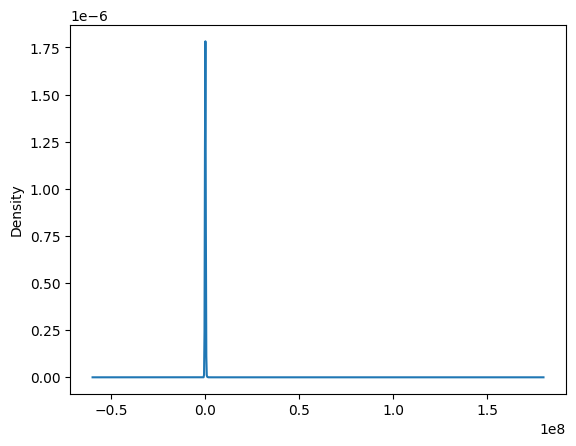

In [24]:
os_maior["Valor"].plot(kind="kde")

<Axes: ylabel='Density'>

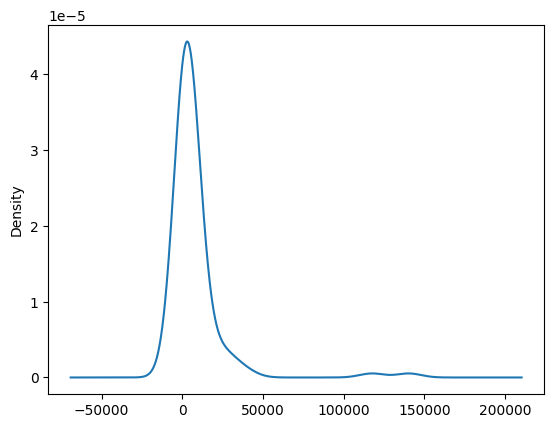

In [25]:
df["Valor"][:100].plot(kind="kde")

--------
# Testando

<Axes: ylabel='Density'>

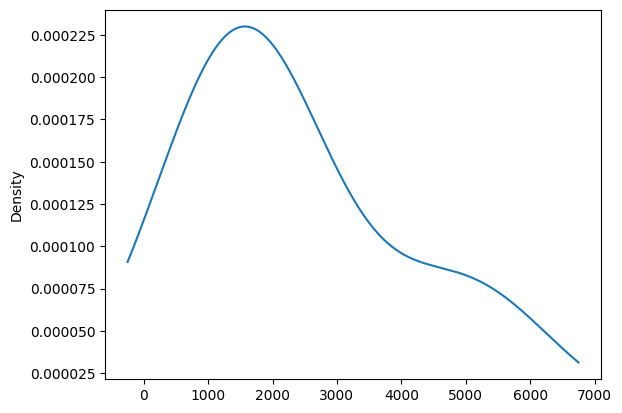

In [26]:
studios = df[df["Tipo"] == "Studio"]

studios["Valor"].plot(kind="kde")

<Axes: ylabel='Density'>

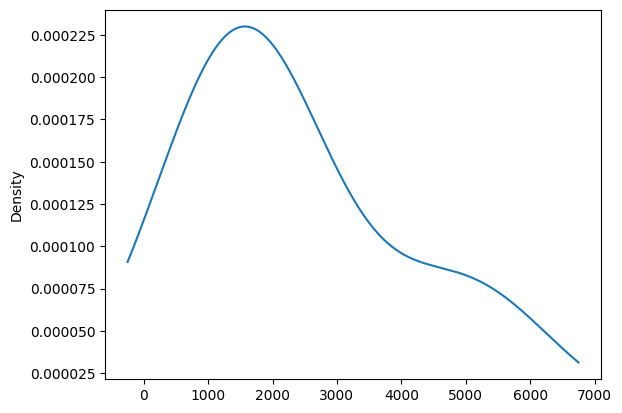

In [27]:
df[df["Tipo"] == "Studio"]["Valor"].plot(kind="kde")

In [28]:
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


tirar tipos com menos de 2 linhas

In [29]:
df_type = df.copy()

In [30]:
df_type

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [34]:
df_type_test = df_type.drop(df_type[df_type["Tipo"]=="Quitinete"].index)

print(df_type_test["Tipo"].value_counts(),
      df_type["Tipo"].value_counts(),
      df["Tipo"].value_counts())

Apartamento                    19532
Conjunto Comercial/Sala         6815
Loja/Salão                      1426
Casa de Condomínio               996
Casa                             967
Galpão/Depósito/Armazém          623
Flat                             476
Prédio Inteiro                   301
Casa Comercial                   265
Casa de Vila                     249
Loja Shopping/ Ct Comercial      247
Box/Garagem                       82
Terreno Padrão                    70
Loft                              51
Sítio                             10
Loteamento/Condomínio              5
Studio                             4
Hotel                              2
Name: Tipo, dtype: int64 Apartamento                    19532
Conjunto Comercial/Sala         6815
Loja/Salão                      1426
Casa de Condomínio               996
Casa                             967
Quitinete                        836
Galpão/Depósito/Armazém          623
Flat                             476
Prédio Inteir

In [32]:
df_type.drop(df_type[df_type["Tipo"] == tipo], inplace=True)

NameError: ignored

In [33]:
tipos_unicos = df_type["Tipo"].unique()

for tipo in tipos_unicos:
    contagem = (df_type["Tipo"] == tipo).sum()
    if contagem < 2:
        df_type.drop(df_type[df_type["Tipo"] == tipo].index, inplace=True)
    else:
        continue


df_type["Tipo"].value_counts()

Apartamento                    19532
Conjunto Comercial/Sala         6815
Loja/Salão                      1426
Casa de Condomínio               996
Casa                             967
Quitinete                        836
Galpão/Depósito/Armazém          623
Flat                             476
Prédio Inteiro                   301
Casa Comercial                   265
Casa de Vila                     249
Loja Shopping/ Ct Comercial      247
Box/Garagem                       82
Terreno Padrão                    70
Loft                              51
Sítio                             10
Loteamento/Condomínio              5
Studio                             4
Hotel                              2
Name: Tipo, dtype: int64

In [ ]:
tipos_unicos = df_type["Tipo"].unique()

for tipo in tipos_unicos:
  contagem = (df_type["Tipo"]== tipo).sum()
  if contagem < 2:
    df_type.drop(df_type[df_type["Tipo"] == tipo])
    #print(tipo, contagem)
  else:
    continue

df_type["Tipo"].value_counts()

In [ ]:
#Como filtrar uma coluna pela quantidade de linhas que são iguais a um determinado valor desta coluna

for tipo in df_type:
  if df_type[df_type["Tipo"]=="Apartamento"]["Tipo"].value_counts() < 2:
    print(tipo)
  else: print("não")

In [ ]:
df_type.drop([0])

In [ ]:
df_type = df

# df_type["Tipo"] = df_type["Tipo"]!="Chácara"
# df_type["Tipo"] = df_type["Tipo"]!="Pousada/Chalé"
# df_type["Tipo"] = df_type["Tipo"]!="Indústria"


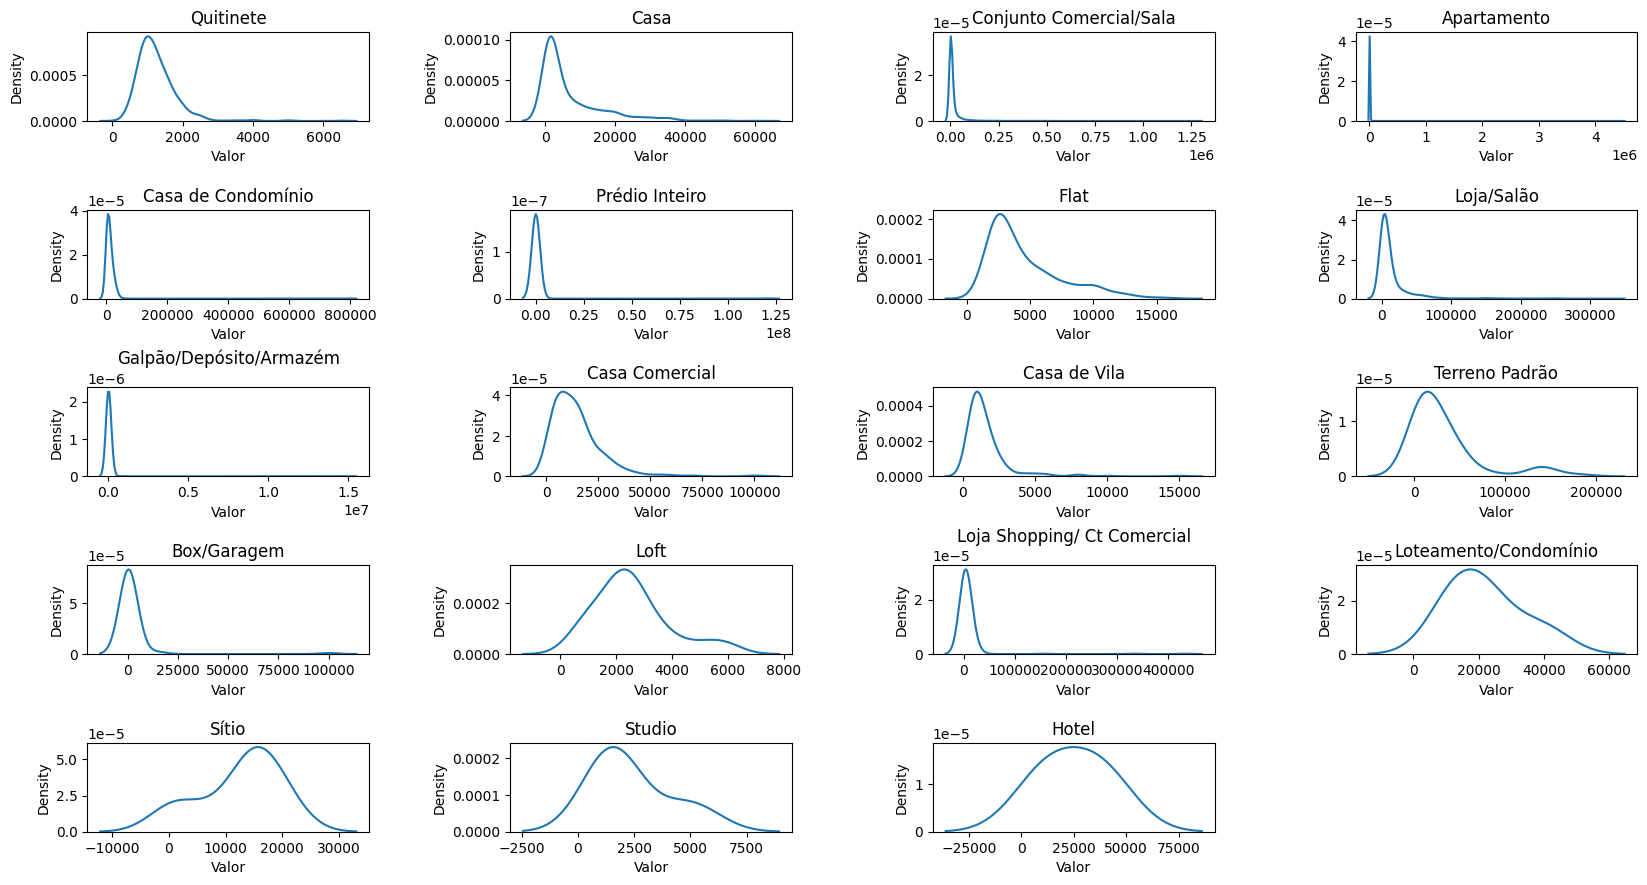

In [102]:
# SubPlot com Seaborn dos valores por tipo


tipos = df_type["Tipo"].unique()

num_linhas = (len(tipos)+2)//3
num_colunas = 4

plt.figure(figsize=(20 ,15))

for i,tipo in enumerate(tipos):
  plt.subplot(num_linhas, num_colunas, i+1)
  plt.subplots_adjust(wspace=0.5, hspace=1)
  sns.kdeplot(data=df_type[df_type["Tipo"] == tipo], x="Valor")
  plt.title(f"{tipo}")

plt.show()

In [ ]:
# Desenvolver média dos Valores categorizados por tipo

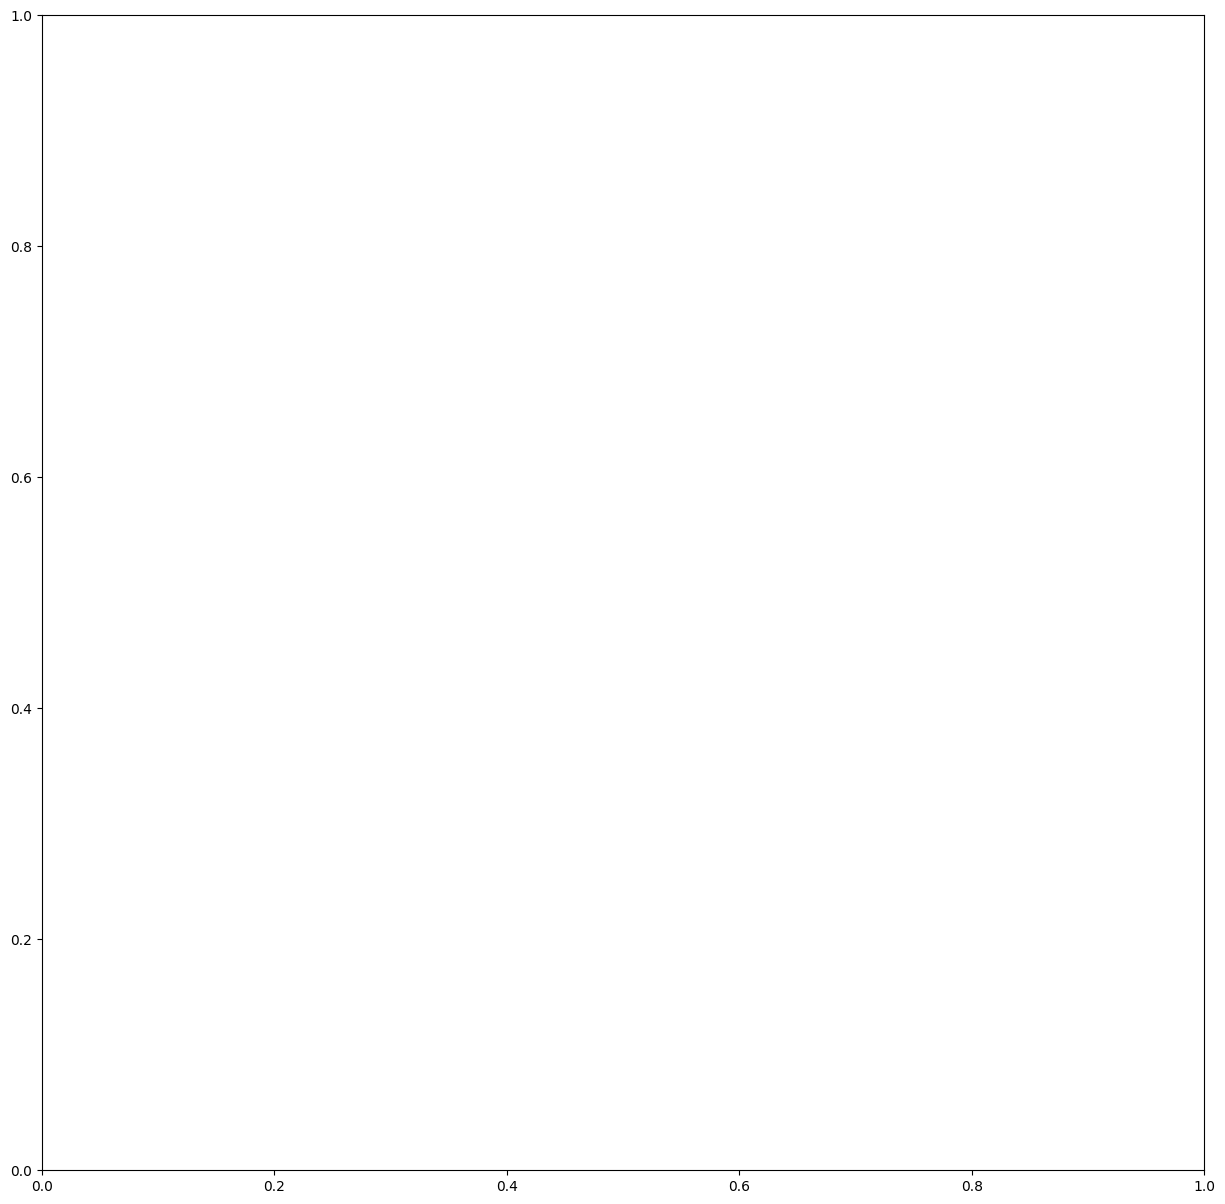

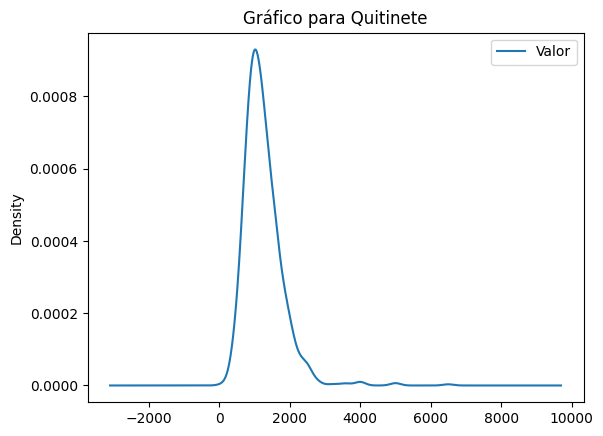

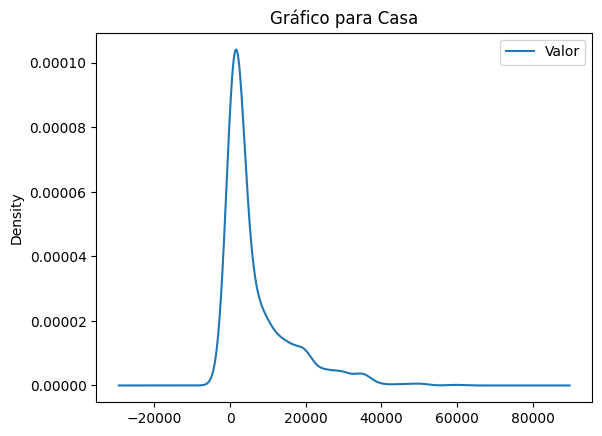

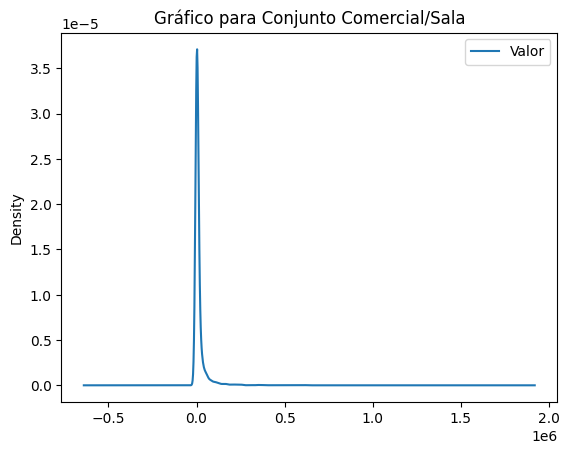

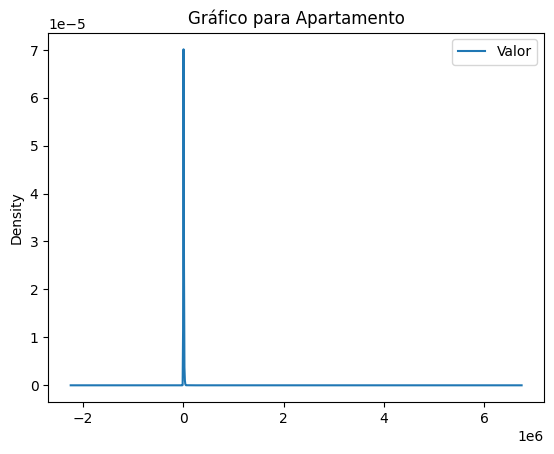

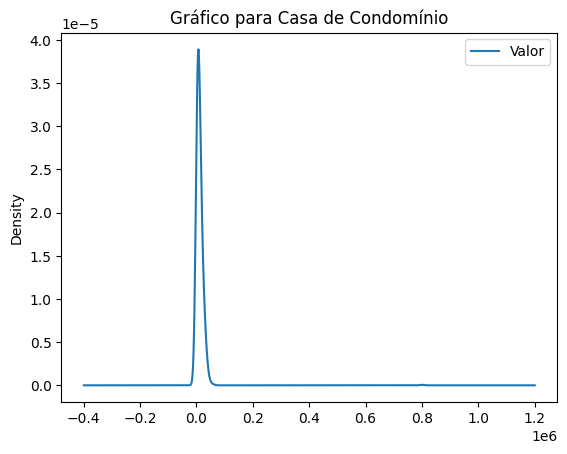

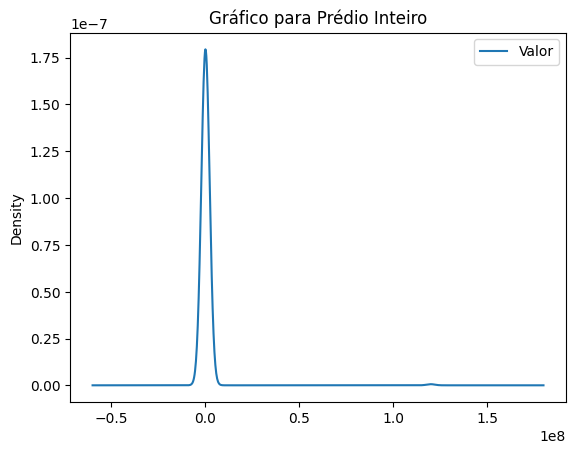

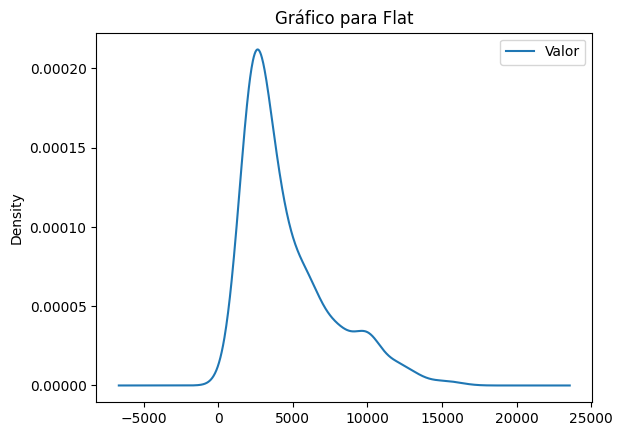

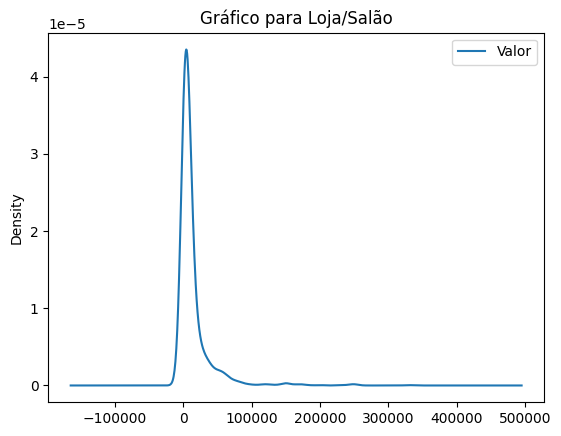

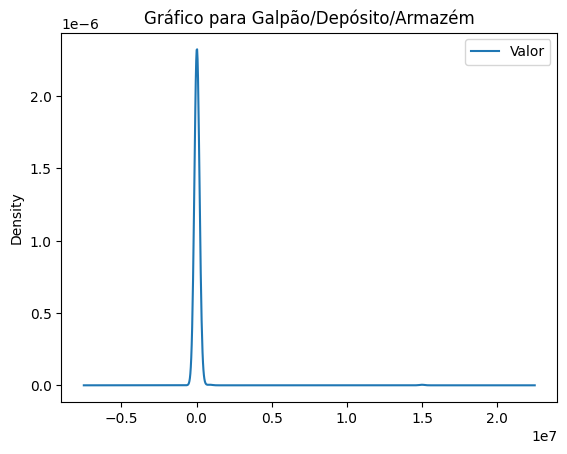

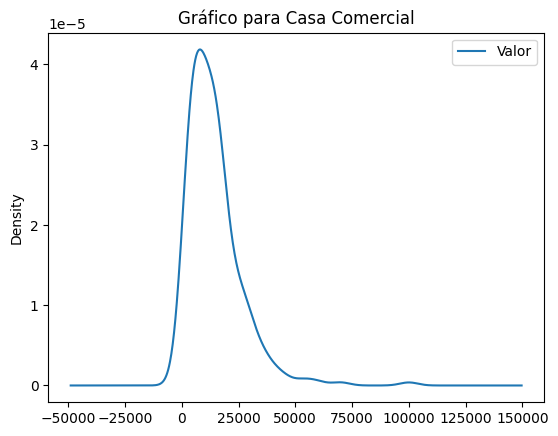

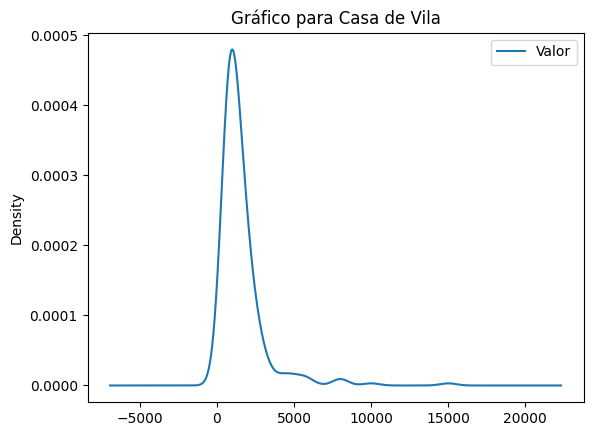

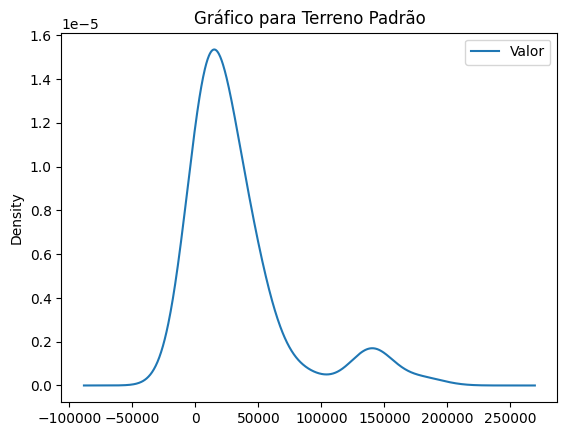

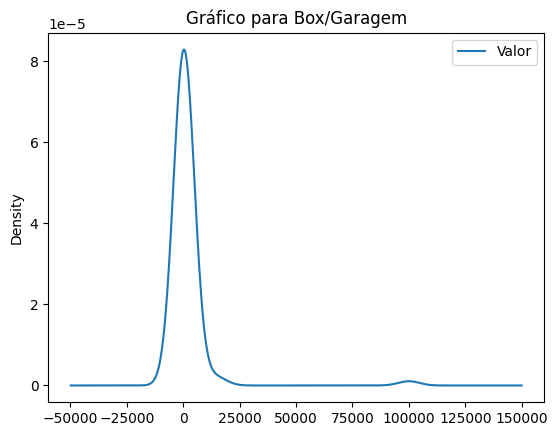

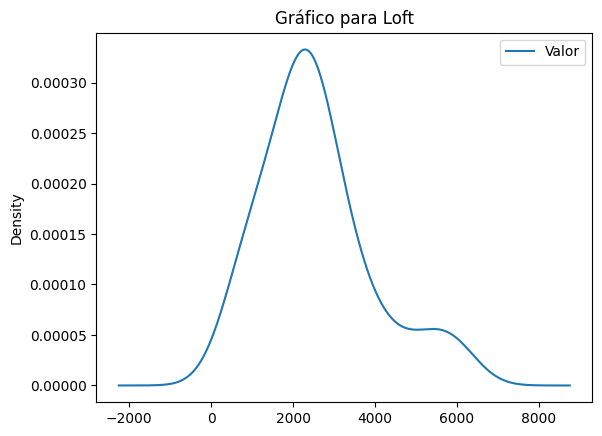

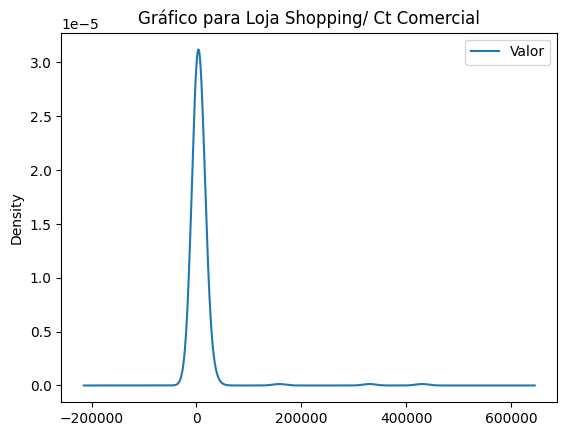

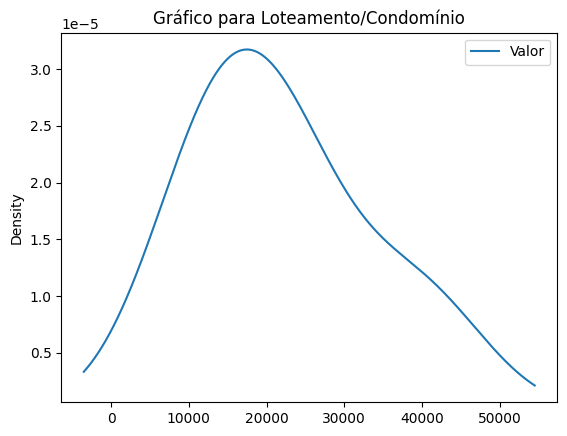

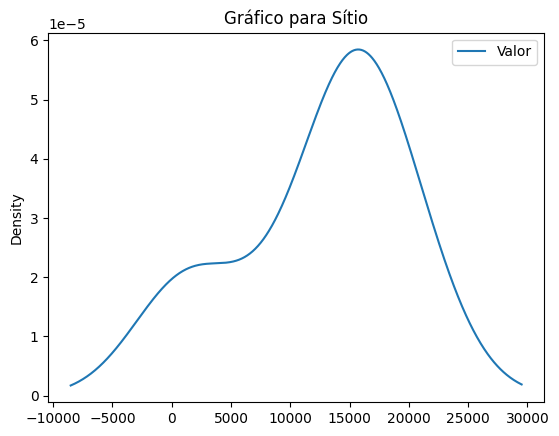

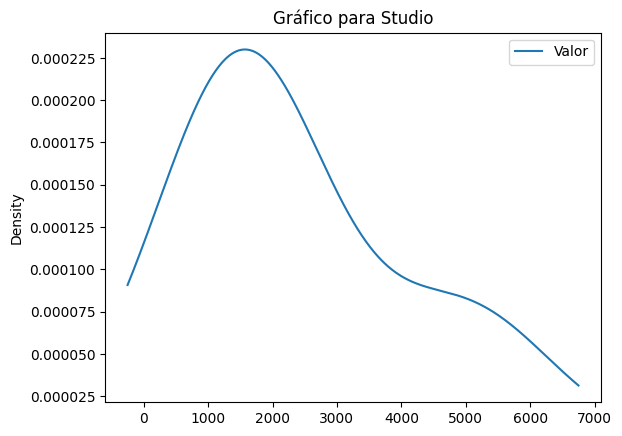

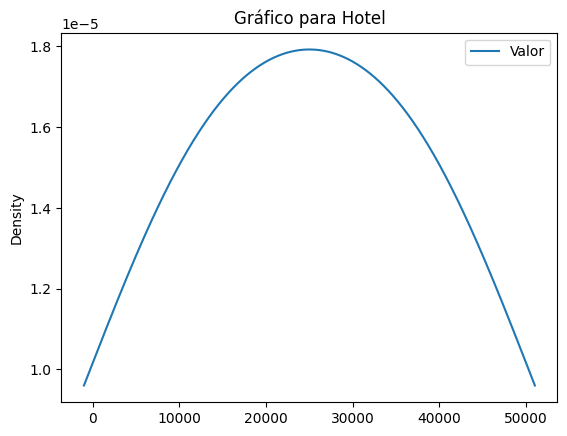

In [47]:
# Como fazer para que os gráficos plotem apenas os dados da Coluna ["Valor"]


tipos = df_type["Tipo"].unique()

plt.figure(figsize=(15,15)).add_subplot(4,3, tipos.index(tipo)+1)

for tipo in tipos:
  #sns.kdeplot(data=df_type["Tipo"] == tipo, x=df_type["Valor"])
  categorias = df_type[df_type["Tipo"] == tipo]
  categorias.plot( y='Valor', title=f'Gráfico para {tipo}', kind="kde")

plt.show()
  #tipo.plot(kind="kde")

In [ ]:
tipos = df_type["Tipo"].unique()


for tipo in tipos:
  #sns.kdeplot(data=df_type["Tipo"] == tipo, x=df_type["Valor"])
  df_type[df_type["Tipo"] == tipo].plot()
  #print(tipo)
  #tipo.plot(kind="kde")

In [ ]:
df_type.head()

In [ ]:
df_type["Tipo"].unique()

In [ ]:
types = []

for tipo in df_type["Tipo"].unique():
  types.append(tipo)


types

In [ ]:
for tipo in types:
  df[""]

In [ ]:
#df[df["Tipo"]=="Hotel"]["Valor"].plot(kind="kde")

sns.kdeplot(data=df[df["Tipo"]=="Hotel"], x="Valor")

In [ ]:
df[df["Tipo"]=="Hotel"]["Valor"].plot(kind="kde")

In [ ]:
for tipo in types:
  df[df["Tipo"]==tipo]

quero fazer vários gráficos para cada tipo de imóvel e seus valores


para analisar a melhor forma de preencher os valores nulos